Most machine learning algorithms can't work with strings but with numbers. That is why categorical encoding is important

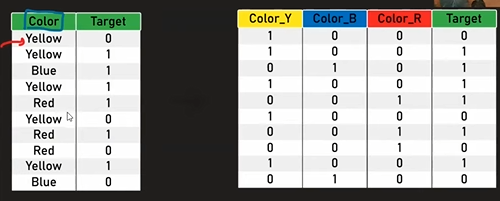

The columns here are colors which are nominal categorical variables so we have to encode them normally

The no of categorical variables should be the no of new columns

In machine learning we should never linear dependency in the input variables then linear algorithms will have a problem as it leads to multicollinearity. So, we instead only show (n-1) columns for n categorical variables

The omitted categorical variable is inherently represented by [0,0.....n-1 times] so it is called a dummy variable

This is called one hot encoding

### 🔢 One-Hot Encoding

**One-Hot Encoding** is used to convert **categorical variables** into a form that could be provided to ML algorithms to do a better job in prediction.

Each category is converted into a **binary vector**:  
- One column per unique category
- Value is **1** if the row belongs to that category, else **0**

---

#### 🧮 Formula / Representation

Suppose a categorical feature **"Color"** has 3 categories:

| Color | Red | Green | Blue |
|-------|-----|-------|------|
| Red   |  1  |   0   |  0   |
| Blue  |  0  |   0   |  1   |
| Green |  0  |   1   |  0   |

---

#### 📘 Legend

- Original column is **replaced by multiple binary columns** (1 for each unique category).
- The presence of a category is marked with **1**, others are **0**.

---

#### 🧠 Intuition

- Prevents the model from assuming **ordinal relationships** between categories.
- Great for **nominal data** (no order like “Red”, “Blue”, “Green”).

---

#### ✅ When to Use

- When your categorical feature has **no meaningful order** (i.e., nominal).
- When the number of unique categories is **manageable** (not in the thousands).

---

#### ⚠️ Caution

- Can cause **curse of dimensionality** if applied to high-cardinality features.
- May require **dimensionality reduction** techniques afterward.

---

#### 🛠️ Scikit-learn Example

```python
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X_categorical)


In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('cars.csv')

In [4]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [5]:
df['brand'].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [6]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

### 1) One hot encoding using pandas

In [7]:
pd.get_dummies(df, columns=['fuel','owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


### 2) k-1 one hot encoding

In [8]:
pd.get_dummies(df, columns=['fuel','owner'], drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


Pandas is not used for encoding as it doesn't remember what number it gave to what column/category

In [9]:
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


### 3) One hot encoding using sklearn

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df.iloc[:,0:4], df.iloc[:,4:], test_size=0.2)

In [11]:
X_train.sample(5)

,brand,km_driven,fuel,owner
3862,Renault,100000,Diesel,Second Owner
6836,Hyundai,47552,Diesel,Second Owner
7079,Renault,100000,Diesel,Second Owner
3698,Honda,50000,Diesel,First Owner
1247,Maruti,38000,Petrol,First Owner


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
ohe=OneHotEncoder(drop='first')

In [30]:
X_train_new=ohe.fit_transform(X_train[['fuel','owner']]).toarray()

In [31]:
X_test_new=ohe.fit_transform(X_test[['fuel','owner']]).toarray()

In [32]:
np.hstack((X_train[['fuel','km_driven']].values, X_train_new))

array([['Petrol', 20000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Diesel', 8500, 1.0, ..., 0.0, 0.0, 0.0],
       ['Petrol', 32000, 0.0, ..., 1.0, 0.0, 0.0],
       ...,
       ['Petrol', 68089, 0.0, ..., 0.0, 0.0, 0.0],
       ['Petrol', 60000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Petrol', 2360457, 0.0, ..., 1.0, 0.0, 0.0]], dtype=object)

In [33]:
np.hstack((X_test[['fuel','km_driven']].values, X_test_new))

array([['Petrol', 60000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Petrol', 20000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Petrol', 15000, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['Diesel', 50000, 1.0, ..., 0.0, 0.0, 0.0],
       ['Diesel', 75000, 1.0, ..., 1.0, 0.0, 0.0],
       ['Diesel', 80000, 1.0, ..., 0.0, 0.0, 0.0]], dtype=object)

### 4) OneHotEncoding with top categories

In [34]:
# here, we are clubbing all brands with less than 100 sales into other_categories

In [37]:
counts=df['brand'].value_counts()

In [38]:
df['brand'].nunique()
threshold=100

In [39]:
repl=counts[counts<=threshold].index

In [40]:
pd.get_dummies(df['brand'].replace(repl, 'uncommon'))

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,True,False,False,False,False,False,False,False,False
8124,False,False,False,False,True,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,True,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,True,False,False,False
